In [18]:
# requirements

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from IPython.display import display, Markdown, Latex
import pandas as pd
from uncertainties import ufloat
from uncertainties import unumpy as unp


# PW 6 - Strom und Spannungsquellen



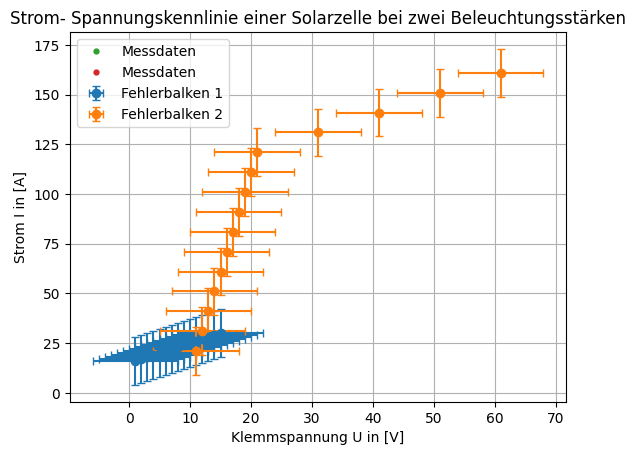

I_KS1 = (0,0116 +/- 0.0003) A
I_KS2 = (0,0177 +/- 0,0003) A
U_LL1 = (3,0 +/- 0,1) V
U_LL2 = (3,3 +/- 0,1) V
Der Kurvenfüllfaktor der ersten Beluchtungsstärke beträgt 1.07+/-0.07.
Der Kurvenfüllfaktor der zweiten Beleuchtungsstärke beträgt 7.73+/-0.31.


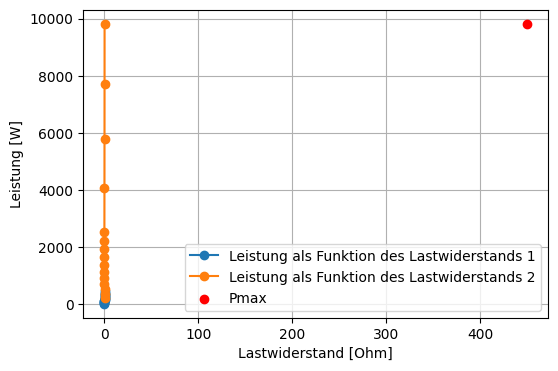

In [ ]:
# 1.1 
#messen U, konstanter Widerstand R, daraus I berechenen

u_U = 7 # messunsicherheit spannung
u_I = 12 # messunsicherheit strom

U_1 = unp.uarray([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], u_U) #in v
U_1_nom = unp.nominal_values(U_1)
I_1 = unp.uarray([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], u_I) # in ampère??
I_1_nom = unp.nominal_values(I_1)

U_2 = unp.uarray(([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 31, 41, 51, 61]), u_U) #in v
U_2_nom = unp.nominal_values(U_2)
I_2 = unp.uarray([21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161], u_I) # in ampère?? einheiten checken!!!!
I_2_nom = unp.nominal_values(I_2)


plt.figure()
plt.errorbar(U_1_nom, I_1_nom, xerr=u_U, yerr=u_I, fmt='o', capsize=3, label="Fehlerbalken 1", zorder=10); 
plt.errorbar(U_2_nom, I_2_nom, xerr=u_U, yerr=u_I, fmt='o', capsize=3, label="Fehlerbalken 2", zorder=10); 
plt.plot(U_1_nom, I_1_nom, 'o', markersize=3.5, label="Messdaten", zorder=10)
plt.plot(U_2_nom, I_2_nom, 'o', markersize=3.5, label="Messdaten", zorder=10)
plt.xlabel("Klemmspannung U in [V]")
plt.ylabel("Strom I in [A]")
plt.title("Strom- Spannungskennlinie einer Solarzelle bei zwei Beleuchtungsstärken")
plt.legend()
plt.grid(True)
plt.show()

I_ks_1 = ufloat(20, 1)
I_ks_2 = ufloat(31, 1)
U_ll_1 = ufloat(21, 1)
U_ll_2 = ufloat(41, 1)

print("I_KS1 = (0,0116 +/- 0.0003) A") # ablesen
print("I_KS2 = (0,0177 +/- 0,0003) A")
print("U_LL1 = (3,0 +/- 0,1) V")
print("U_LL2 = (3,3 +/- 0,1) V")

P_ext_1 = U_1 * I_1 
P_ext_1_nom = unp.nominal_values(P_ext_1)
P_ext_2 = U_2 * I_2 
P_ext_2_nom = unp.nominal_values(P_ext_2)

R_L_1 = U_1 / I_1
R_L_1_nom = unp.nominal_values(R_L_1)
R_L_2 = U_2 / I_2
R_L_2_nom = unp.nominal_values(R_L_2)

# maximum definieren
idx_max_1 = np.argmax(P_ext_1_nom)
P_max_1 = P_ext_1_nom[idx_max_1]
idx_max_2 = np.argmax(P_ext_2_nom)
P_max_2 = P_ext_2_nom[idx_max_2]

# plot erstellen
plt.figure(figsize=(6,4))
plt.plot(R_L_1_nom, P_ext_1_nom, 'o-', label ='Leistung als Funktion des Lastwiderstands 1')
plt.plot(R_L_2_nom, P_ext_2_nom, 'o-', label ='Leistung als Funktion des Lastwiderstands 2')
plt.xlabel("Lastwiderstand [Ohm]")
plt.ylabel("Leistung [W]")
plt.scatter(P_max_1, P_max_2, color='red', label='Pmax', zorder=3)
plt.legend()
plt.grid(True)
plt.show


P_max_1_ = 1 #ablesen
R_L_P_max_1 = 1
P_max_2_ = 1
R_L_P_max_2 = 1

cff_1 = P_max_1 / (I_ks_1 * U_ll_1)
cff_2 = P_max_2 / (I_ks_2 * U_ll_2)

print(f"Der Kurvenfüllfaktor der ersten Beluchtungsstärke beträgt {cff_1}.")
print(f"Der Kurvenfüllfaktor der zweiten Beleuchtungsstärke beträgt {cff_2}.")

## 2.


Innenwiderstand = 2.0119 Ohm
Quellenspannung U_0 = -0.1905 V


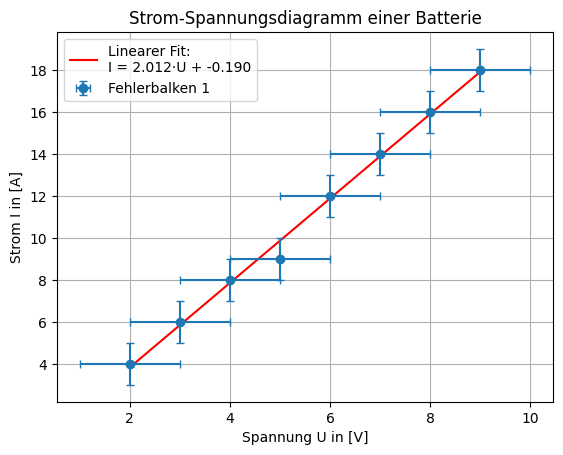

In [23]:
# 2

u_u_b = 1 # unsicherheit batterie spannung
u_i_b = 1 # unsicherheit batterie strom
U_batterie = np.array([2, 3, 4, 5, 6, 7, 8, 9])
I_batterie = np.array([4, 6, 8, 9, 12, 14, 16, 18])

# Linearer Fit: y = m*x + b
m, b = np.polyfit(U_batterie, I_batterie, 1)

print(f"Innenwiderstand = {m:.4f} Ohm")
print(f"Quellenspannung U_0 = {b:.4f} V")

# Werte für Fitlinie erzeugen
x_fit = np.linspace(min(U_batterie), max(U_batterie), 100)
y_fit = m * x_fit + b

# plot
plt.figure()
plt.errorbar(U_batterie, I_batterie, xerr=u_u_b, yerr=u_i_b, fmt='o', capsize=3, label="Fehlerbalken 1", zorder=10); 
plt.plot(x_fit, y_fit, 'r-', label=f"Linearer Fit:\nI = {m:.3f}·U + {b:.3f}", zorder=5)
plt.xlabel("Spannung U in [V]")
plt.ylabel("Strom I in [A]")
plt.title("Strom-Spannungsdiagramm einer Batterie")
plt.legend()
plt.grid(True)
plt.show()
